In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mahotas as mh

# Orignal Images

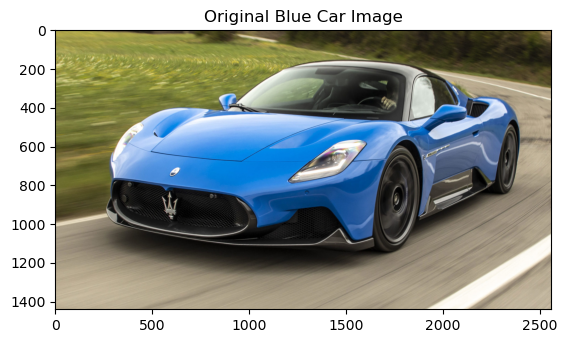

In [2]:
# Load the original image
original_image = cv2.imread('18015-MC20BluInfinito-scaled-e1666008987698.jpg')

# Display the results
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Blue Car Image')
plt.show()

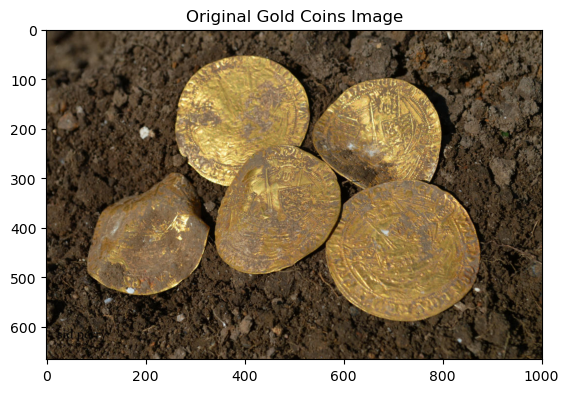

In [3]:
# Load the original image
original_image = cv2.imread('33ea1911-a3a3-11ed-a2dc-6ae66736aa8f.jpg')

# Display the results
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Gold Coins Image')
plt.show()

# Simple Threshold 

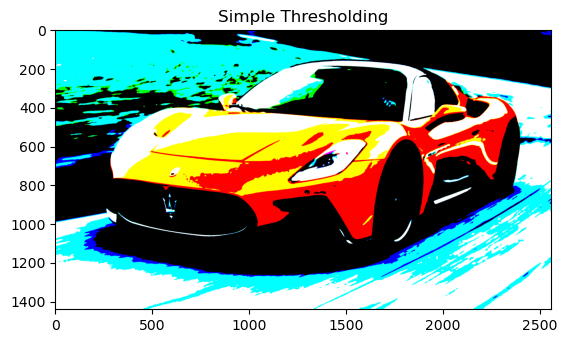

In [4]:
# Load the original image
original_image = cv2.imread('18015-MC20BluInfinito-scaled-e1666008987698.jpg')

# Apply Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(original_image, (15, 15), 0)

# Apply Simple Thresholding
(T, threshold) = cv2.threshold(blurred, 128, 255, cv2.THRESH_BINARY)

# Display the results
plt.imshow(threshold, cmap='gray')
plt.title('Simple Thresholding')
plt.show()

# Simple Threshold with all the steps

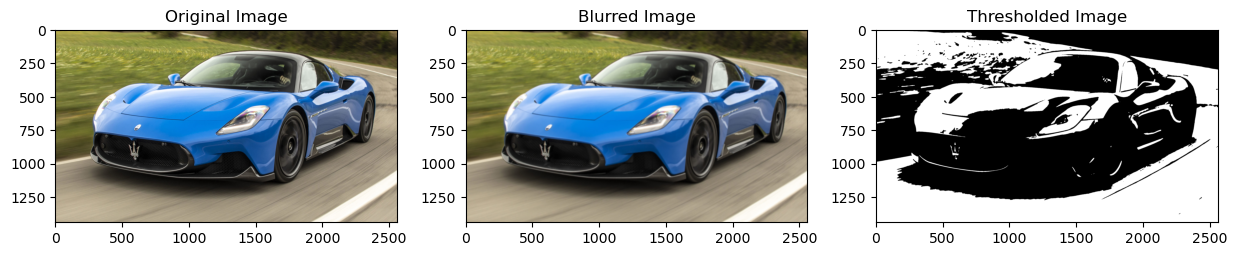

In [5]:
# Load the original image
original_image = cv2.imread('18015-MC20BluInfinito-scaled-e1666008987698.jpg')

# Apply Gaussian blur to the original image
blurred = cv2.GaussianBlur(original_image, (15, 15), 0)

# Convert the blurred image to grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Apply threshold to convert the grayscale image to binary
_, thresholded = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Display the original, blurred, and thresholded images
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')

plt.subplot(1, 3, 3)
plt.imshow(thresholded, cmap='gray')
plt.title('Thresholded Image')

plt.show()

# Attempting Average Blur

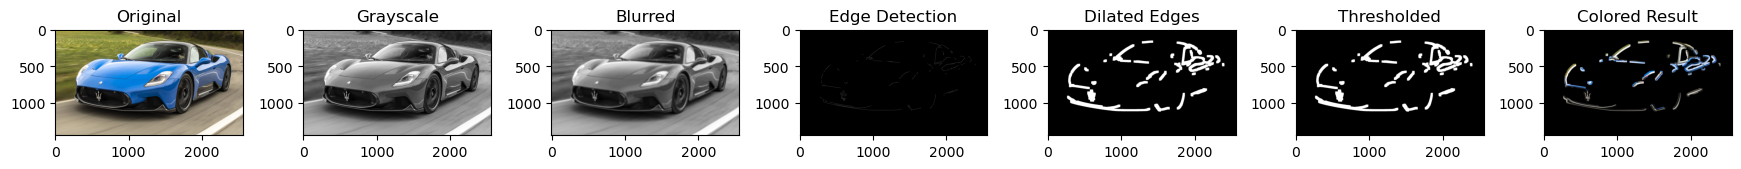

In [6]:
# Load the original image
original_image = cv2.imread('18015-MC20BluInfinito-scaled-e1666008987698.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply average blur to the grayscale image
blurred = cv2.blur(gray, (15, 15))

# Apply Canny edge detection to highlight edges
edges = cv2.Canny(blurred, 30, 100)

# Perform dilation to close small gaps in contours
kernel_dilate = np.ones((30, 30), np.uint8)
dilated_edges = cv2.dilate(edges, kernel_dilate, iterations=1)

# Apply threshold to convert the dilated edges to a binary image
_, thresholded = cv2.threshold(dilated_edges, 128, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask with the same shape as the original image
mask = np.zeros_like(gray)

# Draw the contours on the mask
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Convert the single-channel mask to a 3-channel mask
mask_colored = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Create a black background image
black_background = np.zeros_like(original_image)

# Set pixels inside the contours to the corresponding pixels in the original image
result_colored = np.where(mask_colored != 0, original_image, black_background)

# Display the original, grayscale, blurred, edge-detected, dilated, thresholded, extracted object, and colored result images
plt.figure(figsize=(20, 6))

plt.subplot(1, 8, 1), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 8, 2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(1, 8, 3), plt.imshow(blurred, cmap='gray'), plt.title('Blurred')
plt.subplot(1, 8, 4), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
plt.subplot(1, 8, 5), plt.imshow(dilated_edges, cmap='gray'), plt.title('Dilated Edges')
plt.subplot(1, 8, 6), plt.imshow(thresholded, cmap='gray'), plt.title('Thresholded')
plt.subplot(1, 8, 7), plt.imshow(cv2.cvtColor(result_colored, cv2.COLOR_BGR2RGB)), plt.title('Colored Result')

plt.tight_layout()
plt.show()

# Testing Best Average Blurr

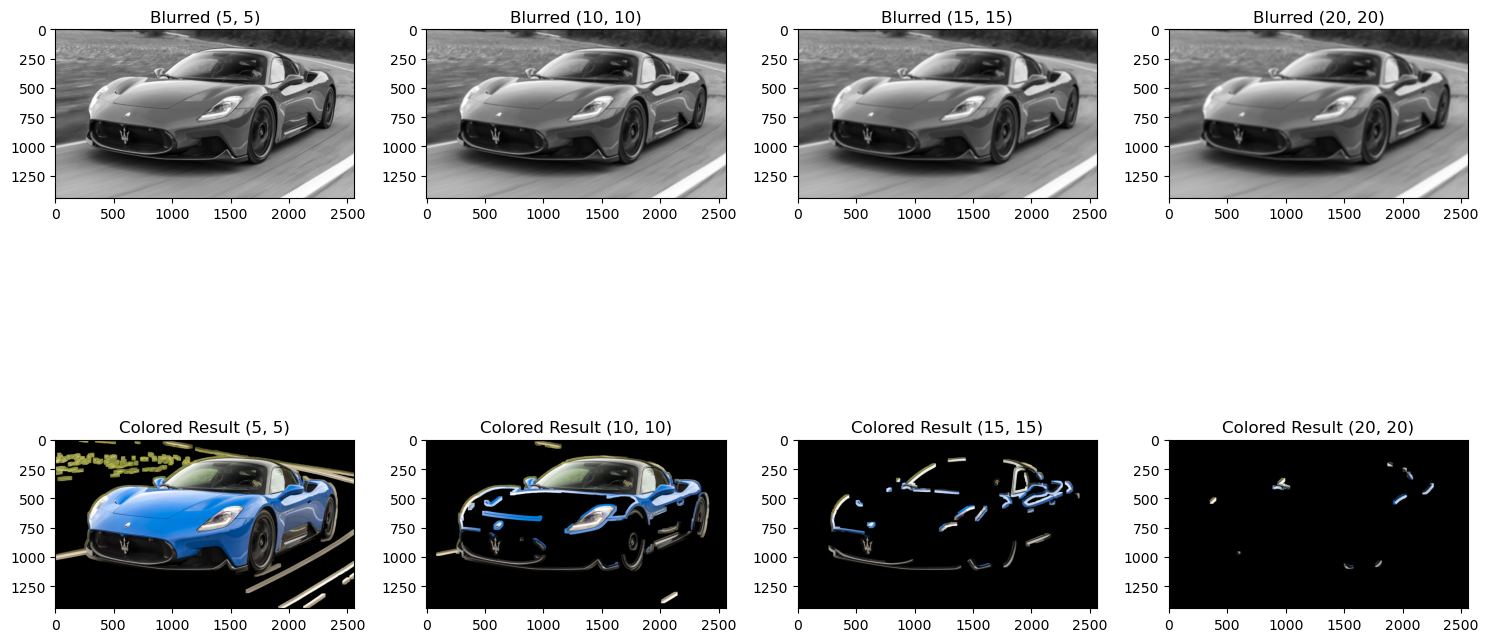

In [7]:
# Load the original image
original_image = cv2.imread('18015-MC20BluInfinito-scaled-e1666008987698.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Define a list of kernel sizes to experiment with
kernel_sizes = [(5, 5), (10, 10), (15, 15), (20, 20)]

# Display images for each kernel size
plt.figure(figsize=(15, 10))
for i, kernel_size in enumerate(kernel_sizes, start=1):
    # Apply average blur to the grayscale image
    blurred = cv2.blur(gray, kernel_size)

    # Apply Canny edge detection to highlight edges
    edges = cv2.Canny(blurred, 30, 100)

    # Perform dilation to close small gaps in contours
    kernel_dilate = np.ones((30, 30), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel_dilate, iterations=1)

    # Apply threshold to convert the dilated edges to a binary image
    _, thresholded = cv2.threshold(dilated_edges, 128, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask with the same shape as the original image
    mask = np.zeros_like(gray)

    # Draw the contours on the mask
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    # Convert the single-channel mask to a 3-channel mask
    mask_colored = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

    # Create a black background image
    black_background = np.zeros_like(original_image)

    # Set pixels inside the contours to the corresponding pixels in the original image
    result_colored = np.where(mask_colored != 0, original_image, black_background)

    # Display the result for each kernel size
    plt.subplot(2, 4, i), plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)), plt.title(f'Blurred ({kernel_size[0]}, {kernel_size[1]})')
    plt.subplot(2, 4, i + 4), plt.imshow(cv2.cvtColor(result_colored, cv2.COLOR_BGR2RGB)), plt.title(f'Colored Result ({kernel_size[0]}, {kernel_size[1]})')

plt.tight_layout()
plt.show()

# Testing Gausian Blur

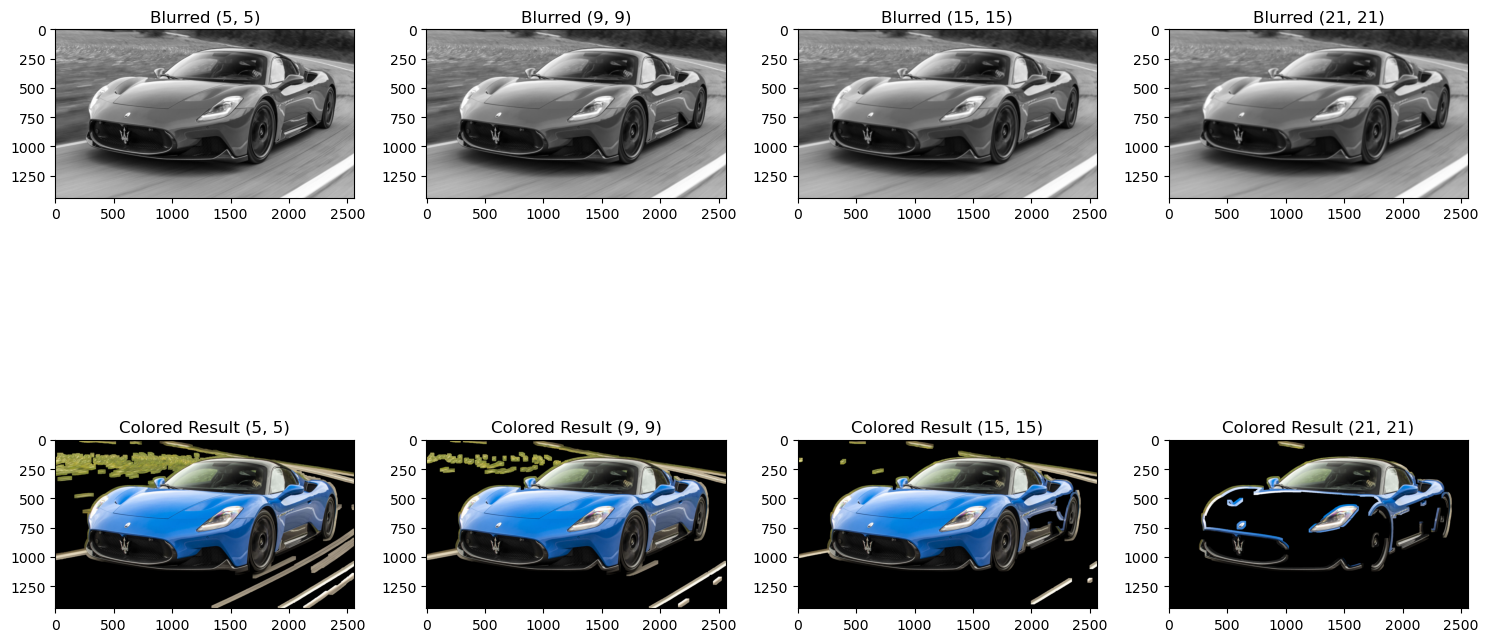

In [8]:
# Load the original image
original_image = cv2.imread('18015-MC20BluInfinito-scaled-e1666008987698.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Define a list of kernel sizes to experiment with
kernel_sizes = [(5, 5), (9, 9), (15, 15), (21, 21)]

# Display images for each kernel size
plt.figure(figsize=(15, 10))
for i, kernel_size in enumerate(kernel_sizes, start=1):
    # Apply Gaussian blur to the grayscale image
    blurred = cv2.GaussianBlur(gray, kernel_size, 0)

    # Apply Canny edge detection to highlight edges
    edges = cv2.Canny(blurred, 30, 100)

    # Perform dilation to close small gaps in contours
    kernel_dilate = np.ones((30, 30), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel_dilate, iterations=1)

    # Apply threshold to convert the dilated edges to a binary image
    _, thresholded = cv2.threshold(dilated_edges, 128, 255, cv2.THRESH_BINARY)

    # Find contours in the binary image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a mask with the same shape as the original image
    mask = np.zeros_like(gray)

    # Draw the contours on the mask
    cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

    # Convert the single-channel mask to a 3-channel mask
    mask_colored = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

    # Create a black background image
    black_background = np.zeros_like(original_image)

    # Set pixels inside the contours to the corresponding pixels in the original image
    result_colored = np.where(mask_colored != 0, original_image, black_background)

    # Display the result for each kernel size
    plt.subplot(2, 4, i), plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB)), plt.title(f'Blurred ({kernel_size[0]}, {kernel_size[1]})')
    plt.subplot(2, 4, i + 4), plt.imshow(cv2.cvtColor(result_colored, cv2.COLOR_BGR2RGB)), plt.title(f'Colored Result ({kernel_size[0]}, {kernel_size[1]})')

plt.tight_layout()
plt.show()

# Simple Threshold with Gausian Blurr

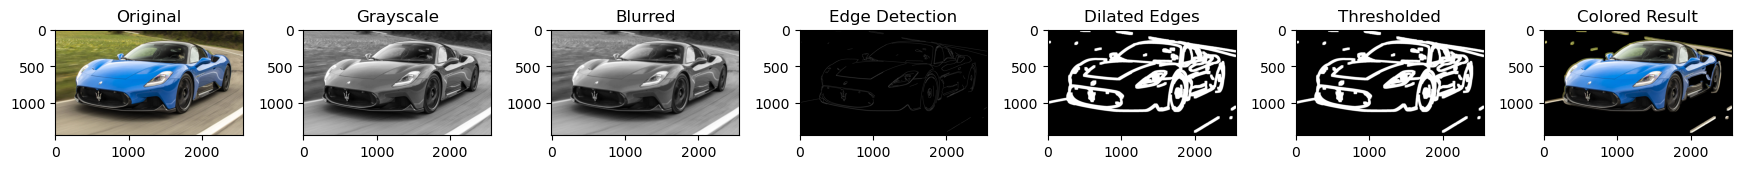

In [9]:
# Load the original image
original_image = cv2.imread('18015-MC20BluInfinito-scaled-e1666008987698.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Apply Canny edge detection to highlight edges
edges = cv2.Canny(blurred, 30, 100)

# Perform dilation to close small gaps in contours
kernel_dilate = np.ones((30, 30), np.uint8)
dilated_edges = cv2.dilate(edges, kernel_dilate, iterations=1)

# Apply threshold to convert the dilated edges to a binary image
_, thresholded = cv2.threshold(dilated_edges, 128, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask with the same shape as the original image
mask = np.zeros_like(gray)

# Draw the contours on the mask
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Convert the single-channel mask to a 3-channel mask
mask_colored = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Create a black background image
black_background = np.zeros_like(original_image)

# Set pixels inside the contours to the corresponding pixels in the original image
result_colored = np.where(mask_colored != 0, original_image, black_background)

# Display the original, grayscale, blurred, edge-detected, dilated, thresholded, extracted object, and colored result images
plt.figure(figsize=(20, 6))

plt.subplot(1, 8, 1), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 8, 2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(1, 8, 3), plt.imshow(blurred, cmap='gray'), plt.title('Blurred')
plt.subplot(1, 8, 4), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
plt.subplot(1, 8, 5), plt.imshow(dilated_edges, cmap='gray'), plt.title('Dilated Edges')
plt.subplot(1, 8, 6), plt.imshow(thresholded, cmap='gray'), plt.title('Thresholded')
plt.subplot(1, 8, 7), plt.imshow(cv2.cvtColor(result_colored, cv2.COLOR_BGR2RGB)), plt.title('Colored Result')

plt.tight_layout()
plt.show()

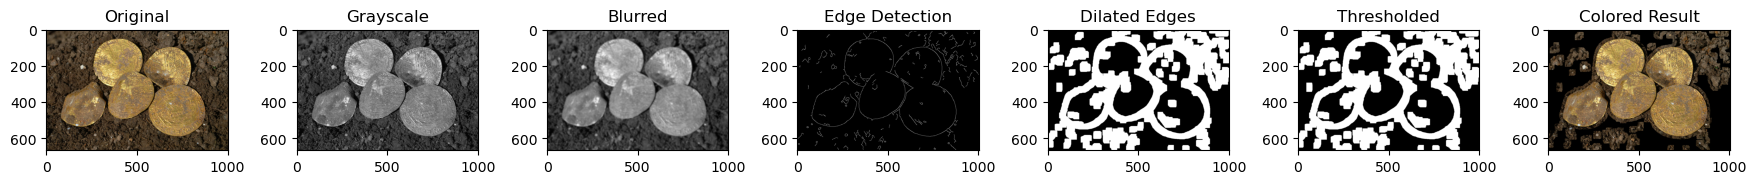

In [10]:
# Load the original image
original_image = cv2.imread('33ea1911-a3a3-11ed-a2dc-6ae66736aa8f.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Apply Canny edge detection to highlight edges
edges = cv2.Canny(blurred, 30, 100)

# Perform dilation to close small gaps in contours
kernel_dilate = np.ones((30, 30), np.uint8)
dilated_edges = cv2.dilate(edges, kernel_dilate, iterations=1)

# Apply threshold to convert the dilated edges to a binary image
_, thresholded = cv2.threshold(dilated_edges, 128, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask with the same shape as the original image
mask = np.zeros_like(gray)

# Draw the contours on the mask
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Convert the single-channel mask to a 3-channel mask
mask_colored = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Create a black background image
black_background = np.zeros_like(original_image)

# Set pixels inside the contours to the corresponding pixels in the original image
result_colored = np.where(mask_colored != 0, original_image, black_background)

# Display the original, grayscale, blurred, edge-detected, dilated, thresholded, extracted object, and colored result images
plt.figure(figsize=(20, 6))

plt.subplot(1, 8, 1), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 8, 2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(1, 8, 3), plt.imshow(blurred, cmap='gray'), plt.title('Blurred')
plt.subplot(1, 8, 4), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
plt.subplot(1, 8, 5), plt.imshow(dilated_edges, cmap='gray'), plt.title('Dilated Edges')
plt.subplot(1, 8, 6), plt.imshow(thresholded, cmap='gray'), plt.title('Thresholded')
plt.subplot(1, 8, 7), plt.imshow(cv2.cvtColor(result_colored, cv2.COLOR_BGR2RGB)), plt.title('Colored Result')

plt.tight_layout()
plt.show()

# Inverse Threshold

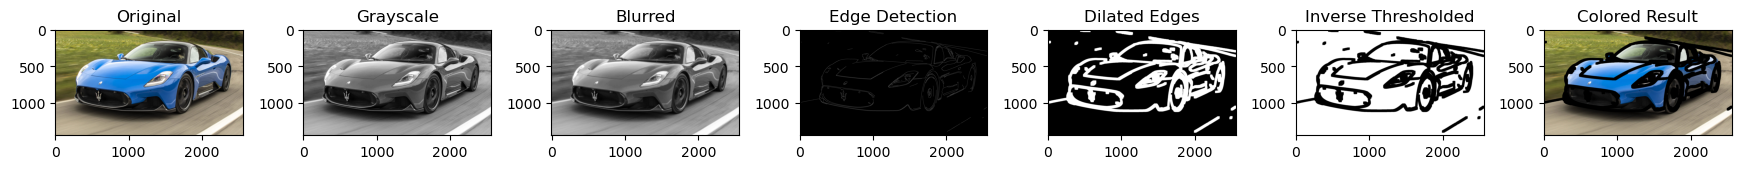

In [11]:
# Load the original image
original_image = cv2.imread('18015-MC20BluInfinito-scaled-e1666008987698.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Apply Canny edge detection to highlight edges
edges = cv2.Canny(blurred, 30, 100)

# Perform dilation to close small gaps in contours
kernel_dilate = np.ones((30, 30), np.uint8)
dilated_edges = cv2.dilate(edges, kernel_dilate, iterations=1)

# Apply inverse threshold to convert the dilated edges to a binary image
_, thresholded_inv = cv2.threshold(dilated_edges, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask with the same shape as the original image
mask = np.zeros_like(gray)

# Draw the contours on the mask
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Convert the single-channel mask to a 3-channel mask
mask_colored = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Create a black background image
black_background = np.zeros_like(original_image)

# Set pixels inside the contours to the corresponding pixels in the original image
result_colored = np.where(mask_colored != 0, original_image, black_background)

# Display the original, grayscale, blurred, edge-detected, dilated, thresholded, extracted object, and colored result images
plt.figure(figsize=(20, 6))

plt.subplot(1, 8, 1), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 8, 2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(1, 8, 3), plt.imshow(blurred, cmap='gray'), plt.title('Blurred')
plt.subplot(1, 8, 4), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
plt.subplot(1, 8, 5), plt.imshow(dilated_edges, cmap='gray'), plt.title('Dilated Edges')
plt.subplot(1, 8, 6), plt.imshow(thresholded_inv, cmap='gray'), plt.title('Inverse Thresholded')
plt.subplot(1, 8, 7), plt.imshow(cv2.cvtColor(result_colored, cv2.COLOR_BGR2RGB)), plt.title('Colored Result')

plt.tight_layout()
plt.show()

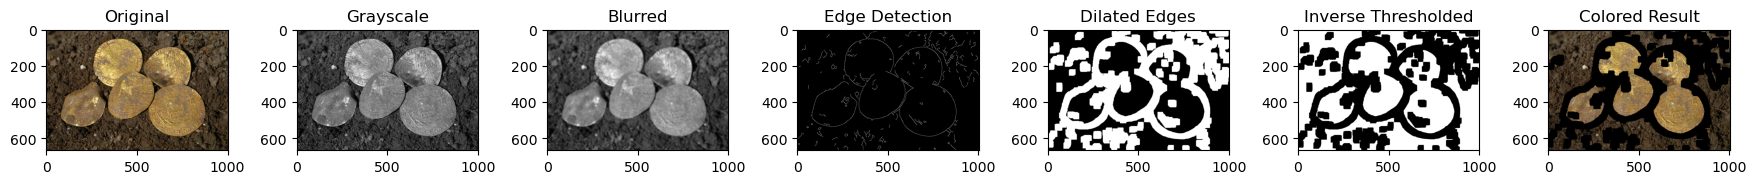

In [12]:
# Load the original image
original_image = cv2.imread('33ea1911-a3a3-11ed-a2dc-6ae66736aa8f.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Apply Canny edge detection to highlight edges
edges = cv2.Canny(blurred, 30, 100)

# Perform dilation to close small gaps in contours
kernel_dilate = np.ones((30, 30), np.uint8)
dilated_edges = cv2.dilate(edges, kernel_dilate, iterations=1)

# Apply inverse threshold to convert the dilated edges to a binary image
_, thresholded_inv = cv2.threshold(dilated_edges, 128, 255, cv2.THRESH_BINARY_INV)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask with the same shape as the original image
mask = np.zeros_like(gray)

# Draw the contours on the mask
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Convert the single-channel mask to a 3-channel mask
mask_colored = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Create a black background image
black_background = np.zeros_like(original_image)

# Set pixels inside the contours to the corresponding pixels in the original image
result_colored = np.where(mask_colored != 0, original_image, black_background)

# Display the original, grayscale, blurred, edge-detected, dilated, thresholded, extracted object, and colored result images
plt.figure(figsize=(20, 6))

plt.subplot(1, 8, 1), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 8, 2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(1, 8, 3), plt.imshow(blurred, cmap='gray'), plt.title('Blurred')
plt.subplot(1, 8, 4), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
plt.subplot(1, 8, 5), plt.imshow(dilated_edges, cmap='gray'), plt.title('Dilated Edges')
plt.subplot(1, 8, 6), plt.imshow(thresholded_inv, cmap='gray'), plt.title('Inverse Thresholded')
plt.subplot(1, 8, 7), plt.imshow(cv2.cvtColor(result_colored, cv2.COLOR_BGR2RGB)), plt.title('Colored Result')

plt.tight_layout()
plt.show()

# Adaptive Threshold

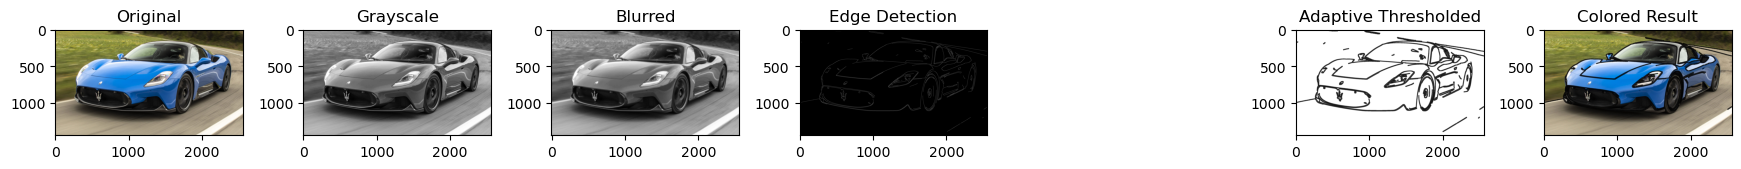

In [13]:
# Load the original image
original_image = cv2.imread('18015-MC20BluInfinito-scaled-e1666008987698.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Apply Canny edge detection to highlight edges
edges = cv2.Canny(blurred, 30, 100)

# # Perform dilation to close small gaps in contours
# kernel_dilate = np.ones((1, 1), np.uint8)
# dilated_edges = cv2.dilate(edges, kernel_dilate, iterations=1)

# Apply adaptive threshold to convert the dilated edges to a binary image
thresholded = cv2.adaptiveThreshold(
    edges, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask with the same shape as the original image
mask = np.zeros_like(gray)

# Draw the contours on the mask
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Convert the single-channel mask to a 3-channel mask
mask_colored = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Create a black background image
black_background = np.zeros_like(original_image)

# Set pixels inside the contours to the corresponding pixels in the original image
result_colored = np.where(mask_colored != 0, original_image, black_background)

# Display the original, grayscale, blurred, edge-detected, dilated, adaptive thresholded, extracted object, and colored result images
plt.figure(figsize=(20, 6))

plt.subplot(1, 8, 1), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 8, 2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(1, 8, 3), plt.imshow(blurred, cmap='gray'), plt.title('Blurred')
plt.subplot(1, 8, 4), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
# plt.subplot(1, 8, 5), plt.imshow(dilated_edges, cmap='gray'), plt.title('Dilated Edges')
plt.subplot(1, 8, 6), plt.imshow(thresholded, cmap='gray'), plt.title('Adaptive Thresholded')
plt.subplot(1, 8, 7), plt.imshow(cv2.cvtColor(result_colored, cv2.COLOR_BGR2RGB)), plt.title('Colored Result')

plt.tight_layout()
plt.show()

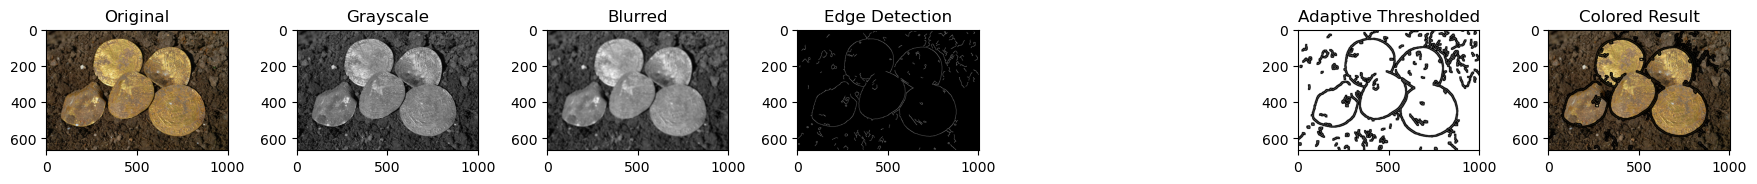

In [14]:
# Load the original image
original_image = cv2.imread('33ea1911-a3a3-11ed-a2dc-6ae66736aa8f.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Apply Canny edge detection to highlight edges
edges = cv2.Canny(blurred, 30, 100)

# # Perform dilation to close small gaps in contours
# kernel_dilate = np.ones((1, 1), np.uint8)
# dilated_edges = cv2.dilate(edges, kernel_dilate, iterations=1)

# Apply adaptive threshold to convert the dilated edges to a binary image
thresholded = cv2.adaptiveThreshold(
    edges, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask with the same shape as the original image
mask = np.zeros_like(gray)

# Draw the contours on the mask
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Convert the single-channel mask to a 3-channel mask
mask_colored = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Create a black background image
black_background = np.zeros_like(original_image)

# Set pixels inside the contours to the corresponding pixels in the original image
result_colored = np.where(mask_colored != 0, original_image, black_background)

# Display the original, grayscale, blurred, edge-detected, dilated, adaptive thresholded, extracted object, and colored result images
plt.figure(figsize=(20, 6))

plt.subplot(1, 8, 1), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 8, 2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(1, 8, 3), plt.imshow(blurred, cmap='gray'), plt.title('Blurred')
plt.subplot(1, 8, 4), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
# plt.subplot(1, 8, 5), plt.imshow(dilated_edges, cmap='gray'), plt.title('Dilated Edges')
plt.subplot(1, 8, 6), plt.imshow(thresholded, cmap='gray'), plt.title('Adaptive Thresholded')
plt.subplot(1, 8, 7), plt.imshow(cv2.cvtColor(result_colored, cv2.COLOR_BGR2RGB)), plt.title('Colored Result')

plt.tight_layout()
plt.show()

# Otsu Threshold

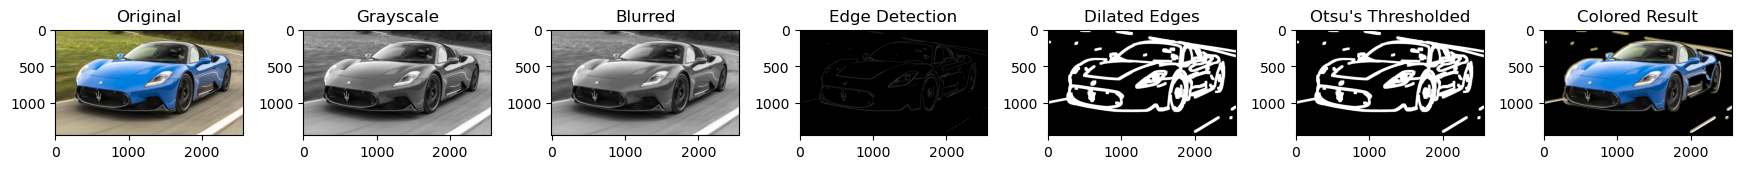

In [15]:
# Load the original image
original_image = cv2.imread('18015-MC20BluInfinito-scaled-e1666008987698.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Apply Canny edge detection to highlight edges
edges = cv2.Canny(blurred, 30, 100)

# Perform dilation to close small gaps in contours
kernel_dilate = np.ones((30, 30), np.uint8)
dilated_edges = cv2.dilate(edges, kernel_dilate, iterations=1)

# Apply Otsu's threshold to convert the dilated edges to a binary image
_, thresholded = cv2.threshold(dilated_edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask with the same shape as the original image
mask = np.zeros_like(gray)

# Draw the contours on the mask
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Convert the single-channel mask to a 3-channel mask
mask_colored = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Create a black background image
black_background = np.zeros_like(original_image)

# Set pixels inside the contours to the corresponding pixels in the original image
result_colored = np.where(mask_colored != 0, original_image, black_background)

# Display the original, grayscale, blurred, edge-detected, dilated, Otsu's thresholded, extracted object, and colored result images
plt.figure(figsize=(20, 6))

plt.subplot(1, 8, 1), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 8, 2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(1, 8, 3), plt.imshow(blurred, cmap='gray'), plt.title('Blurred')
plt.subplot(1, 8, 4), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
plt.subplot(1, 8, 5), plt.imshow(dilated_edges, cmap='gray'), plt.title('Dilated Edges')
plt.subplot(1, 8, 6), plt.imshow(thresholded, cmap='gray'), plt.title("Otsu's Thresholded")
plt.subplot(1, 8, 7), plt.imshow(cv2.cvtColor(result_colored, cv2.COLOR_BGR2RGB)), plt.title('Colored Result')

plt.tight_layout()
plt.show()

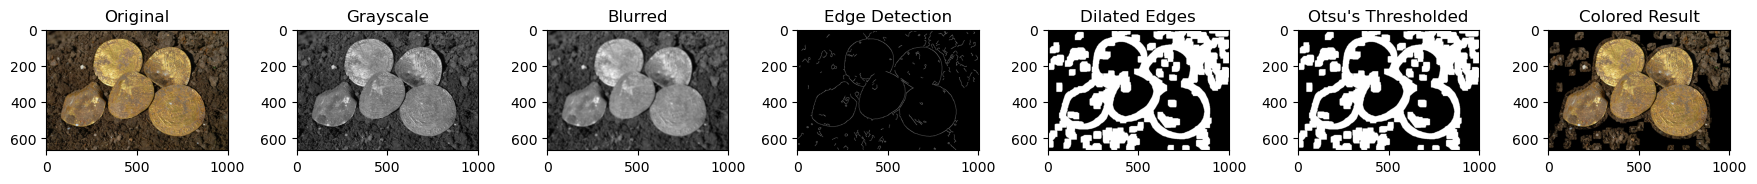

In [16]:
# Load the original image
original_image = cv2.imread('33ea1911-a3a3-11ed-a2dc-6ae66736aa8f.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Apply Canny edge detection to highlight edges
edges = cv2.Canny(blurred, 30, 100)

# Perform dilation to close small gaps in contours
kernel_dilate = np.ones((30, 30), np.uint8)
dilated_edges = cv2.dilate(edges, kernel_dilate, iterations=1)

# Apply Otsu's threshold to convert the dilated edges to a binary image
_, thresholded = cv2.threshold(dilated_edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask with the same shape as the original image
mask = np.zeros_like(gray)

# Draw the contours on the mask
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Convert the single-channel mask to a 3-channel mask
mask_colored = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Create a black background image
black_background = np.zeros_like(original_image)

# Set pixels inside the contours to the corresponding pixels in the original image
result_colored = np.where(mask_colored != 0, original_image, black_background)

# Display the original, grayscale, blurred, edge-detected, dilated, Otsu's thresholded, extracted object, and colored result images
plt.figure(figsize=(20, 6))

plt.subplot(1, 8, 1), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 8, 2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(1, 8, 3), plt.imshow(blurred, cmap='gray'), plt.title('Blurred')
plt.subplot(1, 8, 4), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
plt.subplot(1, 8, 5), plt.imshow(dilated_edges, cmap='gray'), plt.title('Dilated Edges')
plt.subplot(1, 8, 6), plt.imshow(thresholded, cmap='gray'), plt.title("Otsu's Thresholded")
plt.subplot(1, 8, 7), plt.imshow(cv2.cvtColor(result_colored, cv2.COLOR_BGR2RGB)), plt.title('Colored Result')

plt.tight_layout()
plt.show()

# Mahotas Otsu's Threshold

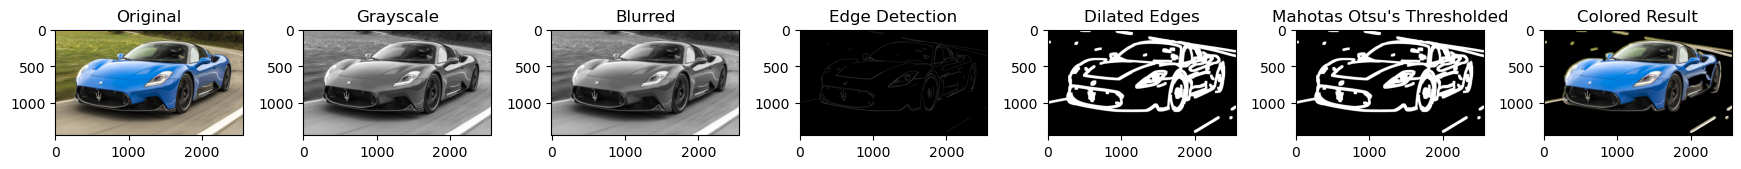

In [17]:
# Load the original image
original_image = cv2.imread('18015-MC20BluInfinito-scaled-e1666008987698.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Apply Canny edge detection to highlight edges
edges = cv2.Canny(blurred, 30, 100)

# Perform dilation to close small gaps in contours
kernel_dilate = np.ones((30, 30), np.uint8)
dilated_edges = cv2.dilate(edges, kernel_dilate, iterations=1)

# Use Mahotas to apply Otsu's thresholding
threshold_value = mh.otsu(dilated_edges)
_, thresholded = cv2.threshold(dilated_edges, threshold_value, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask with the same shape as the original image
mask = np.zeros_like(gray)

# Draw the contours on the mask
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Convert the single-channel mask to a 3-channel mask
mask_colored = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Create a black background image
black_background = np.zeros_like(original_image)

# Set pixels inside the contours to the corresponding pixels in the original image
result_colored = np.where(mask_colored != 0, original_image, black_background)

# Display the original, grayscale, blurred, edge-detected, dilated, Otsu's thresholded, extracted object, and colored result images
plt.figure(figsize=(20, 6))

plt.subplot(1, 8, 1), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 8, 2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(1, 8, 3), plt.imshow(blurred, cmap='gray'), plt.title('Blurred')
plt.subplot(1, 8, 4), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
plt.subplot(1, 8, 5), plt.imshow(dilated_edges, cmap='gray'), plt.title('Dilated Edges')
plt.subplot(1, 8, 6), plt.imshow(thresholded, cmap='gray'), plt.title("Mahotas Otsu's Thresholded")
plt.subplot(1, 8, 7), plt.imshow(cv2.cvtColor(result_colored, cv2.COLOR_BGR2RGB)), plt.title('Colored Result')

plt.tight_layout()
plt.show()

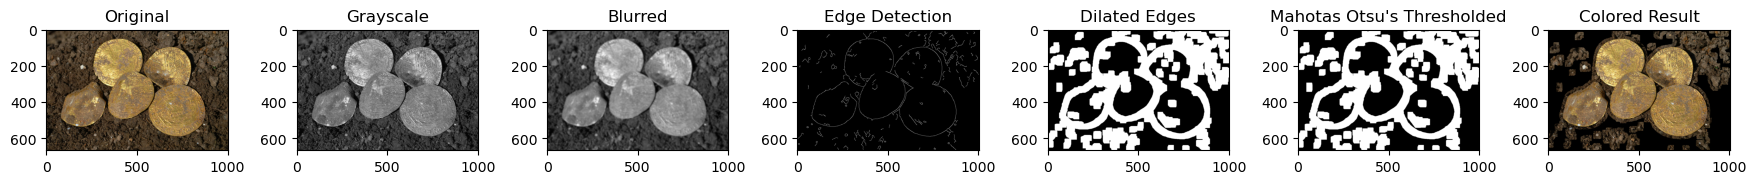

In [18]:
# Load the original image
original_image = cv2.imread('33ea1911-a3a3-11ed-a2dc-6ae66736aa8f.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Apply Canny edge detection to highlight edges
edges = cv2.Canny(blurred, 30, 100)

# Perform dilation to close small gaps in contours
kernel_dilate = np.ones((30, 30), np.uint8)
dilated_edges = cv2.dilate(edges, kernel_dilate, iterations=1)

# Use Mahotas to apply Otsu's thresholding
threshold_value = mh.otsu(dilated_edges)
_, thresholded = cv2.threshold(dilated_edges, threshold_value, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresholded.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a mask with the same shape as the original image
mask = np.zeros_like(gray)

# Draw the contours on the mask
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Convert the single-channel mask to a 3-channel mask
mask_colored = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)

# Create a black background image
black_background = np.zeros_like(original_image)

# Set pixels inside the contours to the corresponding pixels in the original image
result_colored = np.where(mask_colored != 0, original_image, black_background)

# Display the original, grayscale, blurred, edge-detected, dilated, Otsu's thresholded, extracted object, and colored result images
plt.figure(figsize=(20, 6))

plt.subplot(1, 8, 1), plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.subplot(1, 8, 2), plt.imshow(gray, cmap='gray'), plt.title('Grayscale')
plt.subplot(1, 8, 3), plt.imshow(blurred, cmap='gray'), plt.title('Blurred')
plt.subplot(1, 8, 4), plt.imshow(edges, cmap='gray'), plt.title('Edge Detection')
plt.subplot(1, 8, 5), plt.imshow(dilated_edges, cmap='gray'), plt.title('Dilated Edges')
plt.subplot(1, 8, 6), plt.imshow(thresholded, cmap='gray'), plt.title("Mahotas Otsu's Thresholded")
plt.subplot(1, 8, 7), plt.imshow(cv2.cvtColor(result_colored, cv2.COLOR_BGR2RGB)), plt.title('Colored Result')

plt.tight_layout()
plt.show()

# Watershed Segmentation

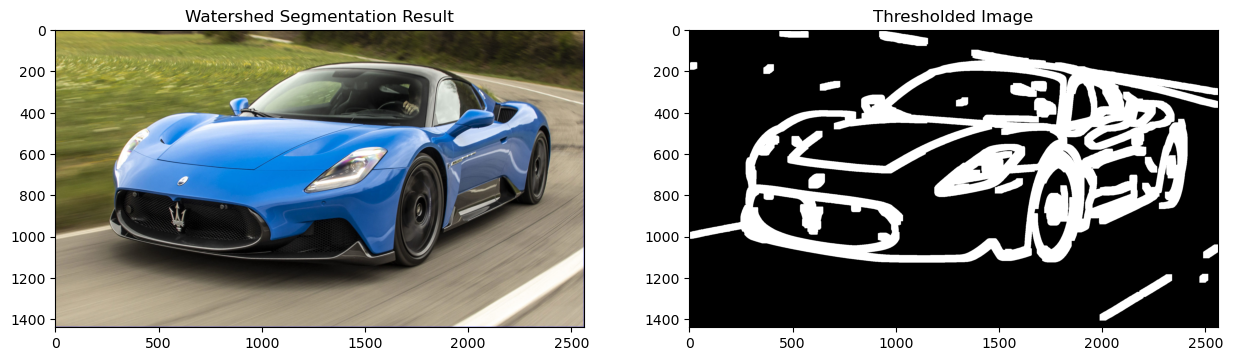

In [19]:
# Load the original image
original_image = cv2.imread('18015-MC20BluInfinito-scaled-e1666008987698.jpg')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Apply Canny edge detection to highlight edges
edges = cv2.Canny(blurred, 30, 100)

# Perform dilation to close small gaps in contours
kernel_dilate = np.ones((30, 30), np.uint8)
dilated_edges = cv2.dilate(edges, kernel_dilate, iterations=1)

# Apply distance transform to find markers for watershed segmentation
dist_transform = cv2.distanceTransform(dilated_edges, cv2.DIST_L2, 5)
_, markers = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Convert markers to 32-bit signed integer
markers = np.int32(markers)

# Apply watershed segmentation
cv2.watershed(original_image, markers)
original_image[markers == -1] = [0, 0, 255]  # Mark watershed boundaries in red

# Display the result
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Watershed Segmentation Result')

plt.subplot(1, 2, 2)
plt.imshow(dilated_edges, cmap='gray')
plt.title('Thresholded Image')

plt.show()

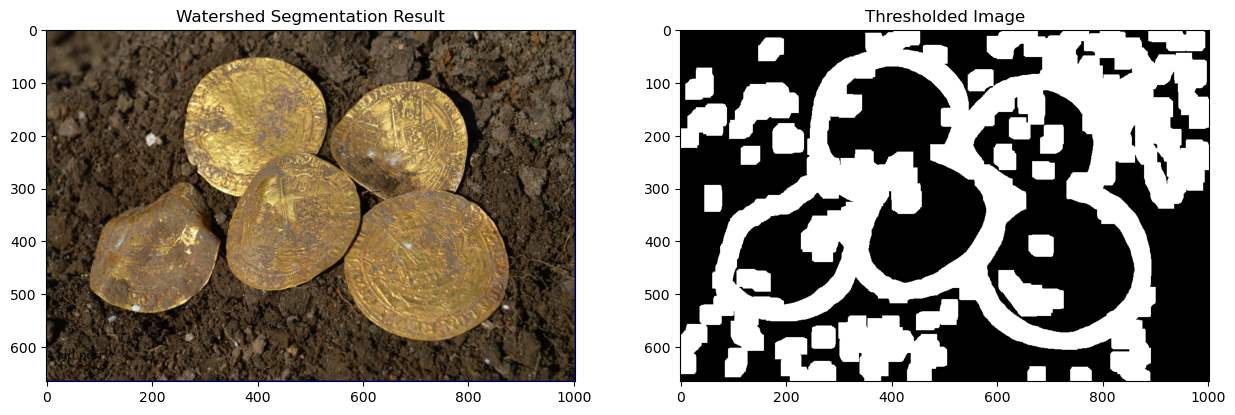

In [20]:
# Load the original image
original_image = cv2.imread('33ea1911-a3a3-11ed-a2dc-6ae66736aa8f.jpg')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Convert the image to grayscale
gray = cv2.cvtColor(original_image, cv2.COLOR_RGB2GRAY)

# Apply Gaussian blur to the grayscale image
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

# Apply Canny edge detection to highlight edges
edges = cv2.Canny(blurred, 30, 100)

# Perform dilation to close small gaps in contours
kernel_dilate = np.ones((30, 30), np.uint8)
dilated_edges = cv2.dilate(edges, kernel_dilate, iterations=1)

# Apply distance transform to find markers for watershed segmentation
dist_transform = cv2.distanceTransform(dilated_edges, cv2.DIST_L2, 5)
_, markers = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

# Convert markers to 32-bit signed integer
markers = np.int32(markers)

# Apply watershed segmentation
cv2.watershed(original_image, markers)
original_image[markers == -1] = [0, 0, 255]  # Mark watershed boundaries in red

# Display the result
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Watershed Segmentation Result')

plt.subplot(1, 2, 2)
plt.imshow(dilated_edges, cmap='gray')
plt.title('Thresholded Image')

plt.show()